# 3. 기상 데이터분석
* 평균 기온이 얼마나 상승했나?
* 가장 더웠던 날과 최고 기온은?
* 가장 추웠던 날과 최저 기온은?
* 일교차가 가장 큰 달은?
* https://data.kma.go.kr/ (기상자료개방포털)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('seoul_temperature.csv')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [4]:
df.shape

(41127, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41127 non-null  object 
 1   지점       41127 non-null  int64  
 2   평균기온(℃)  40371 non-null  float64
 3   최저기온(℃)  40370 non-null  float64
 4   최고기온(℃)  40369 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41127.0,40371.000000,40370.000000,40369.000000
mean,108.0,11.739811,7.445457,16.747876
std,0.0,10.651920,10.876840,10.976389
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.200000
50%,108.0,12.900000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [7]:
df.drop('지점', axis=1, inplace=True)

In [8]:
df.columns = ['날짜', '평균', '최저', '최고']
df.head()

,날짜,평균,최저,최고
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4


In [9]:
df.날짜 = pd.to_datetime(df.날짜)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41127 non-null  datetime64[ns]
 1   평균      40371 non-null  float64       
 2   최저      40370 non-null  float64       
 3   최고      40369 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [10]:
# 년도, 월, 일 컬럼 생성
df['년도'] = df.날짜.dt.year
df['월'] = df.날짜.dt.month
df['일'] = df.날짜.dt.day
df.head()

,날짜,평균,최저,최고,년도,월,일
0,1907-10-01,13.5,7.9,20.7,1907,10,1
1,1907-10-02,16.2,7.9,22.0,1907,10,2
2,1907-10-03,16.2,13.1,21.3,1907,10,3
3,1907-10-04,16.5,11.2,22.0,1907,10,4
4,1907-10-05,17.6,10.9,25.4,1907,10,5


## EDA (탐색적 데이터 분석)
* 평균기온이 얼마나 상승했나?

In [11]:
# 8월 1일 기준으로 매년 평균기온 분석
df_8 = df[(df.월==8) & (df.일==1)]
df_8.head()

,날짜,평균,최저,최고,년도,월,일
305,1908-08-01,26.2,24.4,29.6,1908,8,1
670,1909-08-01,26.5,22.3,32.3,1909,8,1
1035,1910-08-01,27.0,23.5,32.0,1910,8,1
1400,1911-08-01,25.1,21.7,31.0,1911,8,1
1766,1912-08-01,26.2,23.7,31.5,1912,8,1


In [12]:
# 1월 1일 기준으로 평균기온 분석
df_1 = df[(df.월==1) & (df.일==1)]
df_1.head()

,날짜,평균,최저,최고,년도,월,일
92,1908-01-01,-5.9,-9.1,-1.3,1908,1,1
458,1909-01-01,-7.4,-10.8,-3.5,1909,1,1
823,1910-01-01,-5.2,-6.6,0.6,1910,1,1
1188,1911-01-01,-10.1,-14.2,-6.5,1911,1,1
1553,1912-01-01,-0.8,-7.3,4.2,1912,1,1


<AxesSubplot:xlabel='년도', ylabel='평균'>

C:\Users\CHOIMINSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CHOIMINSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CHOIMINSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CHOIMINSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CHOIMINSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\CHOIMINSEO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning

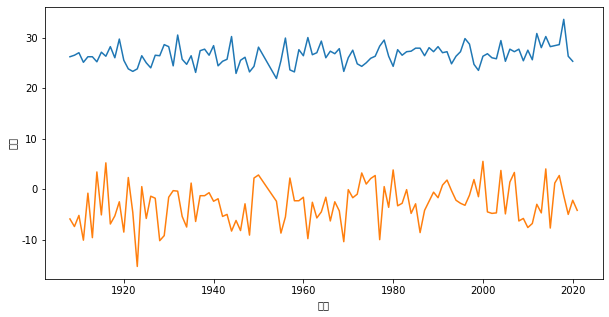

In [13]:
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
sns.lineplot(x='년도', y='평균', data=df_8)
sns.lineplot(x='년도', y='평균', data=df_1)

In [14]:
df.head()

,날짜,평균,최저,최고,년도,월,일
0,1907-10-01,13.5,7.9,20.7,1907,10,1
1,1907-10-02,16.2,7.9,22.0,1907,10,2
2,1907-10-03,16.2,13.1,21.3,1907,10,3
3,1907-10-04,16.5,11.2,22.0,1907,10,4
4,1907-10-05,17.6,10.9,25.4,1907,10,5


In [15]:
# 가장 더웠던 날과 최고 기온은?
df.sort_values(by='최고', ascending=True)

,날짜,평균,최저,최고,년도,월,일
2661,1915-01-13,-19.2,-21.3,-16.3,1915,1,13
8503,1931-01-11,-17.4,-22.5,-14.7,1931,1,11
2662,1915-01-14,-18.0,-21.3,-13.8,1915,1,14
28155,1986-01-05,-16.4,-19.2,-13.6,1986,1,5
18293,1959-01-05,-16.4,-19.8,-13.1,1959,1,5
...,...,...,...,...,...,...,...
16429,1953-11-28,NaN,NaN,NaN,1953,11,28
16430,1953-11-29,NaN,NaN,NaN,1953,11,29
16431,1953-11-30,NaN,NaN,NaN,1953,11,30
21260,1967-02-19,-1.7,NaN,NaN,1967,2,19


In [16]:
# 일교차가 1년 중 가장 큰 달은?
df['일교차'] = df.최고 - df.최저
df.head()

,날짜,평균,최저,최고,년도,월,일,일교차
0,1907-10-01,13.5,7.9,20.7,1907,10,1,12.8
1,1907-10-02,16.2,7.9,22.0,1907,10,2,14.1
2,1907-10-03,16.2,13.1,21.3,1907,10,3,8.2
3,1907-10-04,16.5,11.2,22.0,1907,10,4,10.8
4,1907-10-05,17.6,10.9,25.4,1907,10,5,14.5


In [17]:
pd.DataFrame(df.groupby('월')['일교차'].mean())

,일교차
월,
1,8.428887
2,8.869219
3,9.587794
4,10.818408
5,10.842546
6,9.741171
7,7.372493
8,7.959560
9,9.480795
